In [4]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

# Simulation Parameters
L = 34  # Lattice size
NStp = 200001  # Number of Monte Carlo steps
J = 1.0  # Interaction energy
k = 1.0  # Boltzmann constant
H = 0  # No external field
T_values = np.arange(0.1, 4.1, 0.1)  # Temperature range

Running simulation for T = 0.1...
T = 0.1 => Energy: -2312.00, Magnetization: 1.00
Running simulation for T = 0.2...
T = 0.2 => Energy: -2312.00, Magnetization: -1.00
Running simulation for T = 0.3...
T = 0.3 => Energy: -2312.00, Magnetization: -1.00
Running simulation for T = 0.4...
T = 0.4 => Energy: -2312.00, Magnetization: -1.00
Running simulation for T = 0.5...
T = 0.5 => Energy: -2164.00, Magnetization: -0.01
Running simulation for T = 0.6...
T = 0.6 => Energy: -2312.00, Magnetization: 1.00
Running simulation for T = 0.7...
T = 0.7 => Energy: -2312.00, Magnetization: 1.00
Running simulation for T = 0.8...
T = 0.8 => Energy: -2312.00, Magnetization: 1.00
Running simulation for T = 0.9...
T = 0.9 => Energy: -2312.00, Magnetization: 1.00
Running simulation for T = 1.0...
T = 1.0 => Energy: -2212.00, Magnetization: -0.84
Running simulation for T = 1.1...
T = 1.1 => Energy: -2304.00, Magnetization: 1.00
Running simulation for T = 1.2...
T = 1.2 => Energy: -2296.00, Magnetization: -1.0

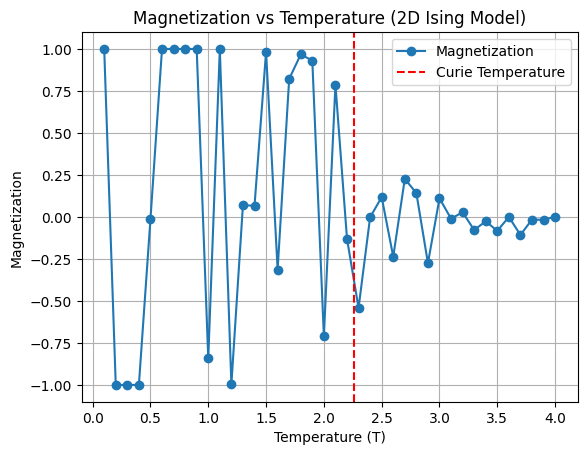

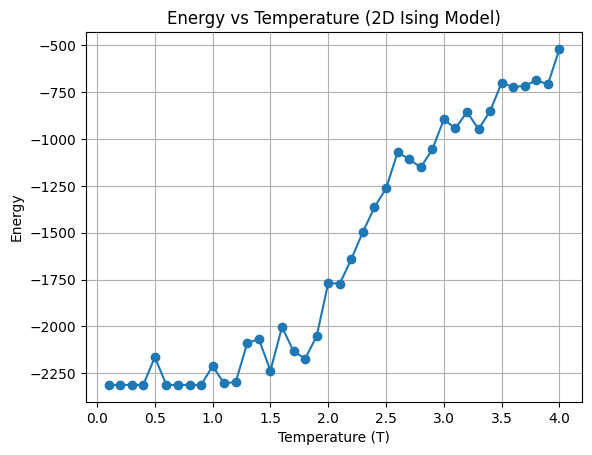

In [2]:
# Function to compute total energy
def compute_energy(S, J, H):
    E = 0
    for i in range(L):
        for j in range(L):
            E -= J * S[i, j] * (
                S[(i + 1) % L, j] + S[(i - 1) % L, j] +
                S[i, (j + 1) % L] + S[i, (j - 1) % L]
            ) + H * S[i, j]
    return 0.5 * E  # Each bond is counted twice

# Function to compute magnetization
def compute_magnetization(S):
    return np.sum(S) / (L**2)

# Function to run the simulation
def ising_simulation(T, H):
    S = np.random.choice([-1, 1], size=(L, L))  # Random spin initialization

    for step in range(NStp):
        # Randomly select a lattice site
        idx, jdx = np.random.randint(0, L, size=2)

        # Compute current energy
        E_current = -J * S[idx, jdx] * (
            S[(idx + 1) % L, jdx] + S[(idx - 1) % L, jdx] +
            S[idx, (jdx + 1) % L] + S[idx, (jdx - 1) % L]
        ) - H * S[idx, jdx]

        # Flip spin
        S_trial = -S[idx, jdx]

        # Compute energy after flip
        E_trial = -J * S_trial * (
            S[(idx + 1) % L, jdx] + S[(idx - 1) % L, jdx] +
            S[idx, (jdx + 1) % L] + S[idx, (jdx - 1) % L]
        ) - H * S_trial

        dE = E_trial - E_current  # Energy difference

        # Metropolis acceptance criterion
        if dE <= 0 or np.random.rand() < np.exp(-dE / (k * T)):
            S[idx, jdx] = S_trial

    E_final = compute_energy(S, J, H)
    M_final = compute_magnetization(S)
    return E_final, M_final

# Initialize lists to store results
M_values = []
E_values = []

# Loop through different temperatures
for T in T_values:
    print(f"Running simulation for T = {T:.1f}...")
    E_final, M_final = ising_simulation(T, H)
    M_values.append(M_final)
    E_values.append(E_final)
    print(f"T = {T:.1f} => Energy: {E_final:.2f}, Magnetization: {M_final:.2f}")

# Plot Magnetization vs Temperature
plt.figure()
plt.plot(T_values, M_values, marker='o', label="Magnetization")
plt.axvline(2.26, color='red', linestyle='dashed', label="Curie Temperature")
plt.xlabel("Temperature (T)")
plt.ylabel("Magnetization")
plt.title("Magnetization vs Temperature (2D Ising Model)")
plt.legend()
plt.grid()
plt.show()

# Plot Energy vs Temperature
plt.figure()
plt.plot(T_values, E_values, marker='o', label="Energy")
plt.xlabel("Temperature (T)")
plt.ylabel("Energy")
plt.title("Energy vs Temperature (2D Ising Model)")
plt.grid()
plt.show()
